## Predict cost of Insurance

Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

In [5]:
# non-numerical columns into numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [9]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [10]:
tf.random.set_seed(42)

In [11]:
model = Sequential([
    layers.Dense(100, input_shape=[11]),            # 11 features so input_shape is 11
    layers.Dense(50),
    layers.Dense(1)
])

In [12]:
optimizer   = tf.keras.optimizers.Adam()
loss        = tf.keras.losses.MeanAbsoluteError()

In [13]:
model.compile(optimizer=optimizer,
              loss=loss)

In [14]:
epochs = 200

In [15]:
history = model.fit(X_train, y_train, epochs=epochs, verbose=1)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13226.0586
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12759.5791
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 11512.4609
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 9273.3809
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7611.5620
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7403.2988
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7370.0552
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7337.6436
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7304.6719
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7273.1450
Epoch 11/200
34/34 [==============================] - 0s 2ms/step - loss: 7243.7998
Epoch 12/200
34/34 [==============================] - 0s 1ms/step - loss: 7204.765

Text(0.5, 0, 'epochs')

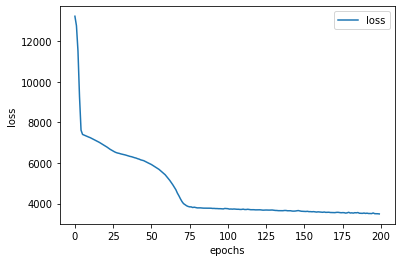

In [16]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [17]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3180.1611


3180.1611328125

## Using ColumnTransformer

In [18]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [20]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region'])
)

In [21]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [24]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [25]:
X_train_normal[:2]

array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

In [26]:
model = Sequential([
    layers.Dense(100, input_shape=[11]),            # 11 features so input_shape is 11
    layers.Dense(50),
    layers.Dense(25),
    layers.Dense(1)
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 26        
Total params: 7,551
Trainable params: 7,551
Non-trainable params: 0
_________________________________________________________________


In [28]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.001)
loss        = tf.keras.losses.MeanAbsoluteError()

In [29]:
model.compile(optimizer=optimizer,
              loss=loss)

In [30]:
epochs = 200

In [31]:
history = model.fit(X_train_normal, y_train, epochs=epochs, verbose=1)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13337.8896
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13251.6045
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12775.7217
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 11230.1836
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 8977.2305
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 8022.0278
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7847.9570
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7677.8926
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7504.8438
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7313.4937
Epoch 11/200
34/34 [==============================] - 0s 1ms/step - loss: 7103.3540
Epoch 12/200
34/34 [==============================] - 0s 1ms/step - loss: 6846.96

Text(0.5, 0, 'epochs')

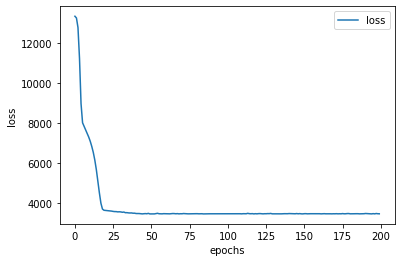

In [32]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [33]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3176.8728


3176.872802734375

## Adding Callbacks

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [35]:
model = Sequential([
    layers.Dense(100, input_shape=[11]),            # 11 features so input_shape is 11
    layers.Dense(50),
    layers.Dense(25),
    layers.Dense(1)
])

In [36]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.001)
loss        = tf.keras.losses.MeanAbsoluteError()

In [37]:
model.compile(optimizer=optimizer,
              loss=loss)

In [38]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr         = ReduceLROnPlateau(monitor='val_loss', patience=10, min_lr=0.001, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [39]:
epochs = 200
callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [40]:
history = model.fit(X_train_normal, y_train, epochs=epochs, verbose=1, callbacks=callbacks, validation_data = (X_test_normal, y_test))

Epoch 1/200
34/34 [==============================] - 1s 6ms/step - loss: 13337.5342 - val_loss: 12941.9111
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13256.0898 - val_loss: 12750.8418
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12810.8008 - val_loss: 11897.4805
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11323.5322 - val_loss: 9780.2715
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 9017.1836 - val_loss: 8302.3730
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 7960.5820 - val_loss: 8143.3472
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7775.8345 - val_loss: 7963.2778
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7602.0850 - val_loss: 7776.9072
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7423.9785 - val_loss: 7598.5508
Epoch 10/200
34/34 [============================

<Figure size 432x288 with 0 Axes>

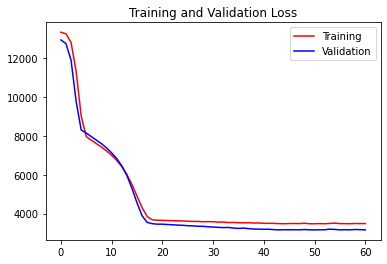

<Figure size 432x288 with 0 Axes>

In [41]:
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [42]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3158.6685


3158.66845703125